In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import os
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [4]:
project_root = '/Users/abalgabekova/Desktop/Akerke/stacked-unets'
data_dir = os.path.join(project_root,'dataset', 'data-etci-flood','train')

In [5]:
from src.helpers import read_metrics
from src.main import visualize_examples
import config

/Users/abalgabekova/Desktop/Akerke/stacked-unets/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [11]:
def colab_to_local(input_str):
    if '/content/stacked-unets/output' in input_str:
        input_str = input_str.replace('/content/stacked-unets/output', output_dir)
    if '/content/stacked-unets/dataset/data-etci-flood/train' in input_str:
        input_str = input_str.replace('/content/stacked-unets/dataset/data-etci-flood/train', data_dir)
    
    return input_str

In [26]:
SAMPLE_IMAGES = [
 'bangladesh_20170314t115609_x-11_y-20',
 'nebraska_20170731t002118_x-9_y-26',
 'nebraska_20170731t002118_x-10_y-14',
 'northal_20190407t234651_x-19_y-18',
]

In [10]:
IMAGES = [
    'northal_20190407t234651_x-14_y-27',
    'northal_20190407t234651_x-15_y-27',
    'bangladesh_20170712t115615_x-16_y-32',
    'bangladesh_20170606t115613_x-11_y-1',
    'nebraska_20171222t002118_x-15_y-39',
    'nebraska_20170601t002114_x-9_y-22',
    'northal_20191227t234659_x-4_y-24'
]

### baseline

In [7]:
output_type = ""
output_dir = os.path.join(project_root, f'output{output_type}')
print(output_dir)

/Users/abalgabekova/Desktop/Akerke/stacked-unets/output


In [8]:
labels_dir = os.path.join(output_dir, f'etci_labels')
print(labels_dir)

/Users/abalgabekova/Desktop/Akerke/stacked-unets/output/etci_labels


In [20]:
RUN = ""
if RUN:
    loaded_dict = np.load(f'{output_dir}/test_df_run{RUN}.npy', allow_pickle=True).item()
else:
    loaded_dict = np.load(f'{output_dir}/test_df.npy', allow_pickle=True).item()
test_df = pd.DataFrame.from_dict(loaded_dict)
test_df = test_df.reset_index(drop=True)

In [22]:
columns_to_update = ['flood_label_path', 'water_body_label_path','semantic_map_prev_level', 'vv_image_path', 'vh_image_path' ]

for col in columns_to_update:
    test_df[col] = test_df[col].apply(colab_to_local)

In [15]:
from src.helpers import find_prediction_image

indices = []
for image_name in IMAGES:
    idx = find_prediction_image(f"{image_name}.npy", test_df)
    indices.append(idx)

In [27]:
from src.helpers import find_prediction_image

indices = []
for image_name in SAMPLE_IMAGES:
    idx = find_prediction_image(f"{image_name}.png", test_df)
    indices.append(idx)

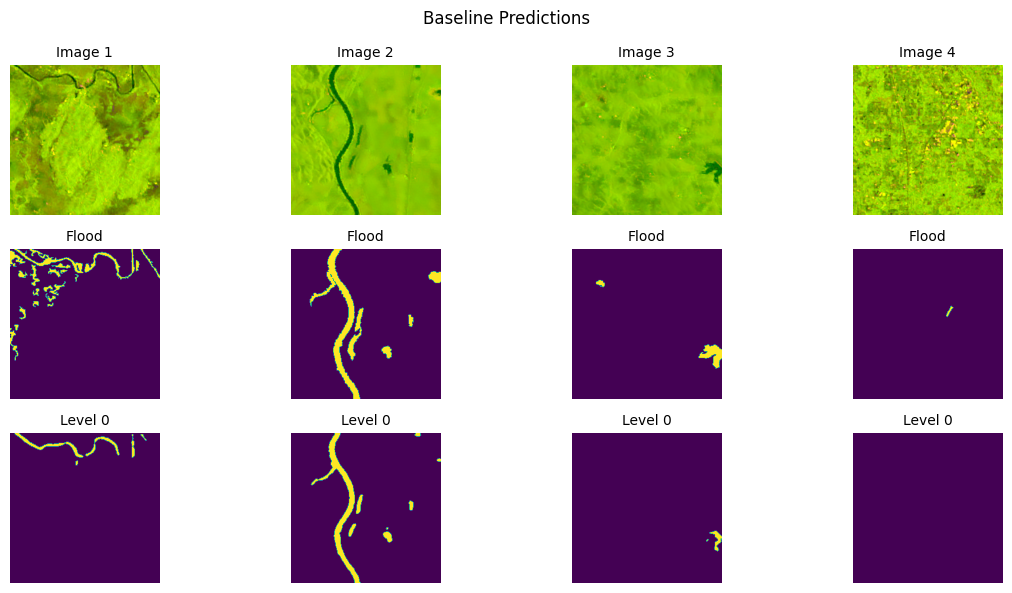

In [28]:
from src.utils import visualize_prediction

visualize_prediction(image_indices=indices, df=test_df, n_levels=1, dataset=config.dataset, main_title='Baseline Predictions', target_filename='another_etci_baseline')

### stacked with semantic map

In [30]:
output_type = '_semantic'
output_dir = os.path.join(project_root, f'output{output_type}')
output_dir

'/Users/abalgabekova/Desktop/Akerke/stacked-unets/output_semantic'

In [31]:
RUN = 0
labels_dir = os.path.join(output_dir, f'output{output_type}_run{RUN+1}', 'etci_labels')
labels_dir

'/Users/abalgabekova/Desktop/Akerke/stacked-unets/output_semantic/output_semantic_run1/etci_labels'

In [32]:
loaded_dict = np.load(f'{output_dir}/output{output_type}_run{RUN+1}/test_df.npy', allow_pickle=True).item()
test_df = pd.DataFrame.from_dict(loaded_dict)
test_df = test_df.reset_index(drop=True)

In [33]:
def colab_to_local(input_str):
    if '/content/stacked-unets/output' in input_str:
        input_str = input_str.replace('/content/stacked-unets/output', f"{output_dir}/output{output_type}_run{RUN+1}")
    if '/content/stacked-unets/dataset/data-etci-flood/train' in input_str:
        input_str = input_str.replace('/content/stacked-unets/dataset/data-etci-flood/train', data_dir)
    
    return input_str

In [34]:
columns_to_update = ['flood_label_path', 'water_body_label_path','semantic_map_prev_level', 'vv_image_path', 'vh_image_path' ]

for col in columns_to_update:
    test_df[col] = test_df[col].apply(colab_to_local)

In [36]:
indices = []
for image_name in SAMPLE_IMAGES:
    idx = find_prediction_image(f"{image_name}.png", test_df, output_type="semantic_map")
    indices.append(idx)

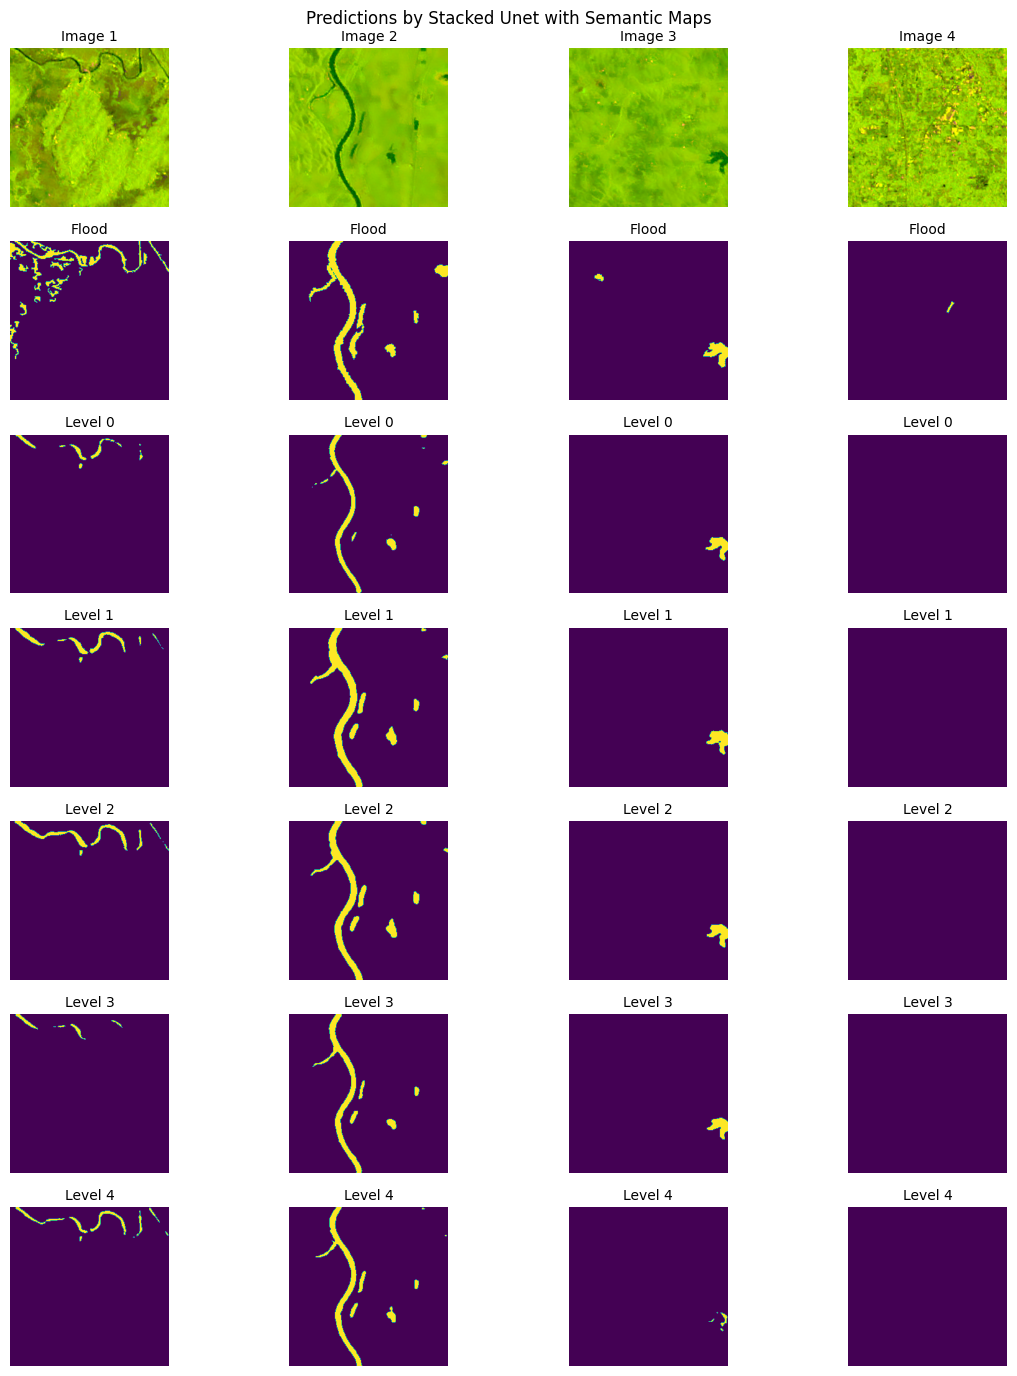

In [38]:
visualize_prediction(image_indices=indices, df=test_df, n_levels=5, 
                     dataset=config.dataset, output_dir=f'{output_dir}/output{output_type}_run{RUN+1}',
                     output_type ="semantic_map",
                     main_title='Predictions by Stacked Unet with Semantic Maps', 
                     target_filename='another_etci_semantic')

### stacked with softmax probabilities

In [39]:
output_type = '_softmax'
output_dir = os.path.join(project_root, f'output{output_type}')
output_dir

'/Users/abalgabekova/Desktop/Akerke/stacked-unets/output_softmax'

In [40]:
RUN = 1
labels_dir = os.path.join(output_dir, f'output{output_type}_run{RUN+1}', 'etci_labels')
labels_dir

'/Users/abalgabekova/Desktop/Akerke/stacked-unets/output_softmax/output_softmax_run2/etci_labels'

In [41]:
loaded_dict = np.load(f'{output_dir}/output{output_type}_run{RUN+1}/test_df_run0.npy', allow_pickle=True).item()
test_df = pd.DataFrame.from_dict(loaded_dict)
test_df = test_df.reset_index(drop=True)

In [42]:
def colab_to_local(input_str):
    if '/content/stacked-unets/output' in input_str:
        input_str = input_str.replace('/content/stacked-unets/output', f"{output_dir}/output{output_type}_run{RUN+1}")
    if '/content/stacked-unets/dataset/data-etci-flood/train' in input_str:
        input_str = input_str.replace('/content/stacked-unets/dataset/data-etci-flood/train', data_dir)
    
    return input_str

In [43]:
columns_to_update = ['flood_label_path', 'water_body_label_path','semantic_map_prev_level', 'vv_image_path', 'vh_image_path', 'softmax_prob_prev_level']

for col in columns_to_update:
    test_df[col] = test_df[col].apply(colab_to_local)

In [45]:
indices = []
for image_name in SAMPLE_IMAGES:
    idx = find_prediction_image(f"{image_name}.npy", test_df, output_type="softmax_prob")
    indices.append(idx)

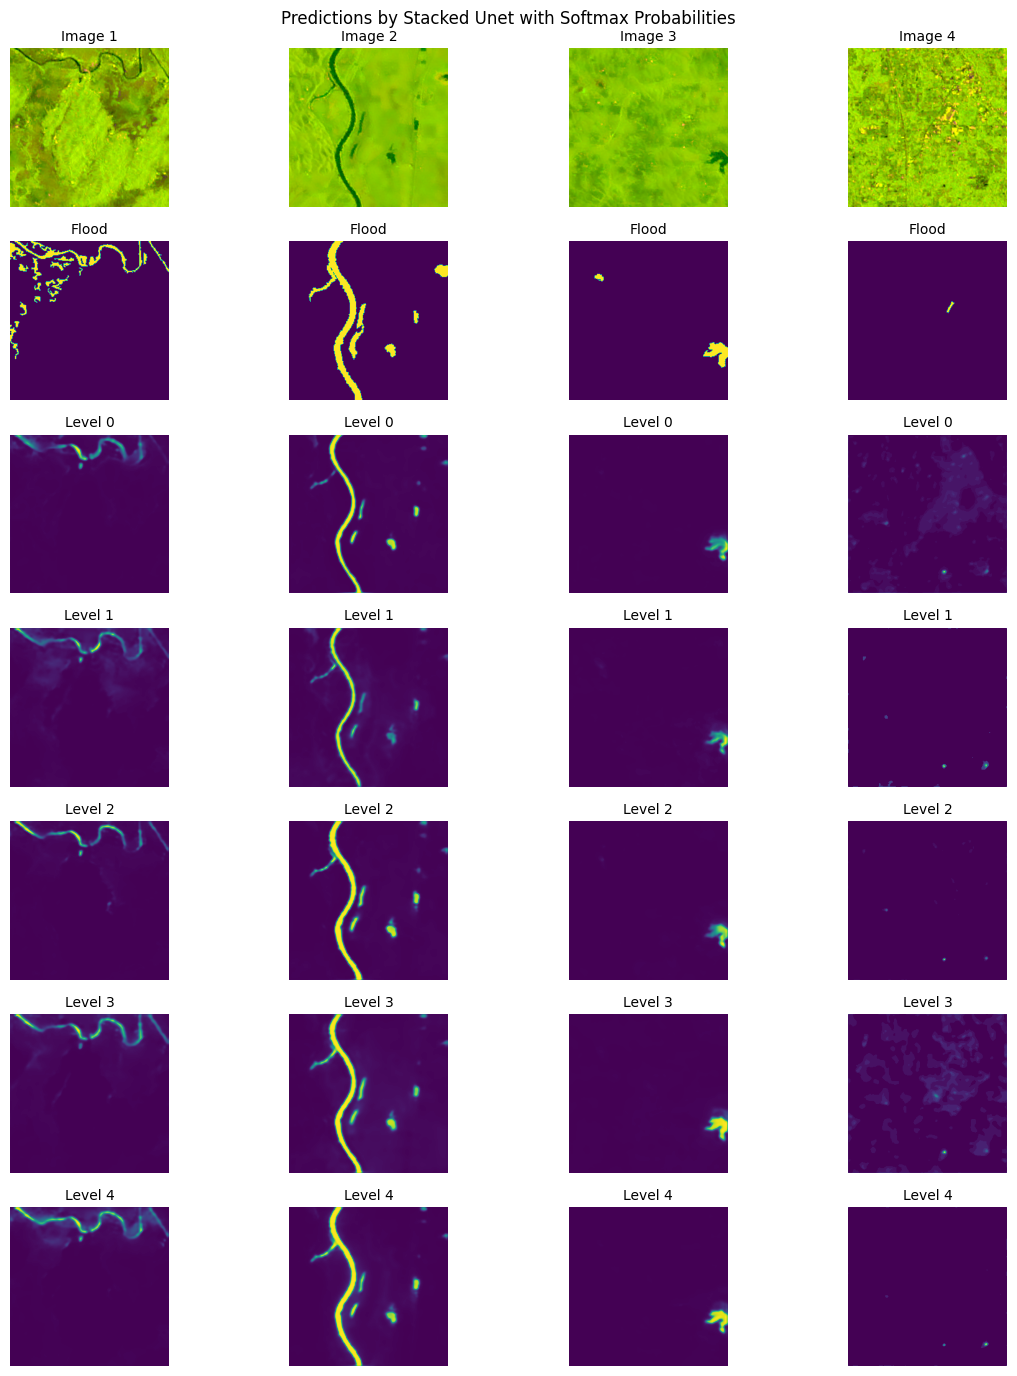

In [47]:
visualize_prediction(image_indices=indices, df=test_df, n_levels=5, 
                     dataset=config.dataset, output_dir=f'{output_dir}/output{output_type}_run{RUN+1}',
                     output_type ="softmax_prob",
                     labels_dir=labels_dir,
                     main_title='Predictions by Stacked Unet with Softmax Probabilities', 
                     target_filename='another_etci_softmax')